The goal of this example to show, how we can use Artap to solve a simple,
bi-objective optimization problem.

The problem is defined in the following way [GDE3]:

Minimize f1 = x1
Minimize f2 = (1+x2) / x1

subject to
        x1 e [0.1, 1]
        x2 e [0, 5]

The Pareto - front of the following problem is known, it is a simple
hyperbola. This problem is very simple for an Evolutionary algorithm, it finds its solution within 20-30 generations.
NSGA - II algorithm is used to solve this example.

References
----------

.: [GDE3] The third Evolution Step of Generalized Differential Evolution
Saku Kukkonen, Jouni Lampinen

In [1]:
from artap.problem import Problem
from artap.algorithm_genetic import NSGAII
from artap.results import Results

In [2]:
class BiObjectiveTestProblem(Problem):
    def set(self):
        # Not mandatory to give a name for the test problem
        self.name = 'Biobjective Test Problem'
        self.working_dir = '.'
        # Defines x_1 and x_2, which are the optimized parameters
        # and the bounds 'defines' the constraints of the optimization problem
        # nsga -- ii algorithm doesn't need an initial value for the definition
        self.parameters = [{'name': 'x_1', 'bounds': [0.1, 1.]},
                           {'name': 'x_2', 'bounds': [0.0, 5.0]}]

        # The two, separate optimization functions and the direction of the optimization
        # is set to minimization. It is also possible to use the maximize keyword.
        self.costs = [{'name': 'f_1', 'criteria': 'minimize'},
                      {'name': 'f_2', 'criteria': 'minimize'}]

    def evaluate(self, individual):
        # The individual.vector function contains the problem parameters in the appropriate (previously defined) order
        f1 = individual.vector[0]
        f2 = (1 + individual.vector[1]) / individual.vector[0]
        # individual.auxvar = [1.]
        return [f1, f2]

In [3]:
# Initialization of the problem
problem = BiObjectiveTestProblem()

# Perform the optimization iterating over 100 times on 100 individuals.
algorithm = NSGAII(problem)
algorithm.options['max_population_number'] = 100
algorithm.options['max_population_size'] = 100
algorithm.run()

2020-11-25 11:06:18,807 (INFO): BiObjectiveTestProblem-793503 - run (146) - NSGA_II: 100/10000
2020-11-25 11:06:22,884 (INFO): BiObjectiveTestProblem-793503 - run (173) - NSGA_II: elapsed time: 4.076584100723267 s


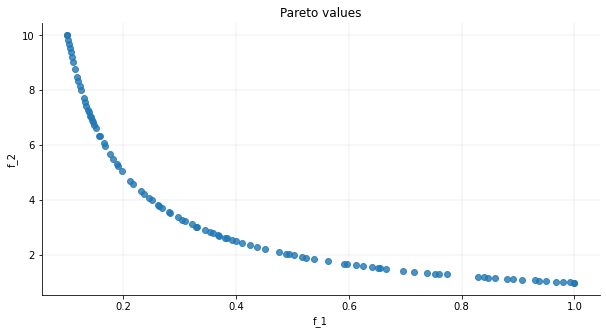

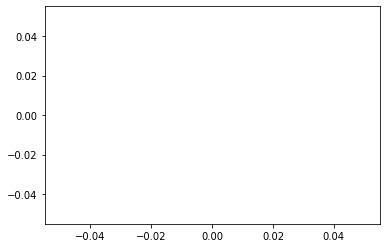

In [4]:
# Post - processing the results
# reads in the result values into the b, results class
results = Results(problem)
results.pareto_values()
results.pareto_plot()

# Convergence plot on a selected goal function and parameter
slice = results.goal_on_parameter('x_2', 'f_2')
import pylab as plt
plt.plot(slice[0], slice[1])
plt.show()

Measure the quality of the solution with the aid of the built-in performace metrics
We have to define a solution, which is a list of the [x, 1/x] tuples in the given area.
The reference function can be defined by the following list comprehension:

In [5]:
reference = [(0.1 + x * 4.9 / 1000, 1. / (0.1 + x * 4.9 / 1000)) for x in range(0, 1000)]
print('Additive unary epsilon indicator:', results.performance_measure(reference))
print('Generational distance:', results.performance_measure(reference, type='gd'))

Additive unary epsilon indicator: 0.799803873615679
Generational distance: 0.026115014122268465
